# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [121]:
print("Фиксируем рандомную часть, чтобы наши значения были случайны, но при этом повторимы")

Фиксируем рандомную часть, чтобы наши значения были случайны, но при этом повторимы


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [257]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [258]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2183,Renault Fluence 1.5,2013,580000,67000,Diesel,Individual,Manual,Second Owner,20.4 kmpl,1461 CC,108.5 bhp,240Nm@ 1850rpm,5.0
3054,Tata Indica Vista Quadrajet VX,2012,200000,90000,Diesel,Individual,Manual,First Owner,22.3 kmpl,1248 CC,74 bhp,190Nm@ 1750-3000rpm,5.0
3921,Maruti Celerio ZXI,2015,400000,30000,Petrol,Individual,Manual,First Owner,23.1 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
5690,Maruti Swift Dzire ZDI,2013,375000,80000,Diesel,Individual,Manual,Fourth & Above Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
3193,Mahindra Bolero PLUS AC,2008,350000,90000,Diesel,Individual,Manual,First Owner,13.6 kmpl,2523 CC,63 bhp,180 Nm at 1440-1500rpm,7.0
2701,Toyota Platinum Etios 1.4 GXD,2018,730000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.05 bhp,170Nm@ 1800-2400rpm,5.0
2044,Maruti Swift VXI,2019,610000,5000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
5117,Maruti Swift VDI Optional,2016,590000,120000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
5232,Maruti Ertiga ZDI,2014,680000,64000,Diesel,Individual,Manual,Second Owner,20.77 kmpl,1248 CC,88.8 bhp,200Nm@ 1750rpm,7.0
2904,Chevrolet Sail 1.2 LS ABS,2016,400000,30000,Petrol,Individual,Manual,First Owner,18.2 kmpl,1199 CC,82.4 bhp,108.5Nm@ 5000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [259]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [125]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [126]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [127]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [128]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [129]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски есть в признаках mileage, engine, max_power, torque и seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [260]:
df_train.shape[0] - df_train.drop(columns=['selling_price']).drop_duplicates().shape[0]

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [261]:
df_train.drop(df_train.drop(columns=['selling_price']).drop_duplicates().index)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [262]:
df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns,
                         keep='first', inplace=True)

In [263]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [264]:
df_train.reset_index(drop=True, inplace=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [265]:
df_train['mileage'] = df_train['mileage'].str.extract(r'(\d+\.?\d+)').astype(float)
df_train['engine'] = df_train['engine'].str.extract(r'(\d+)').astype(float)
df_train['max_power'] = df_train['max_power'].str.extract(r'(\d+\.?\d+)').astype(float)

df_test['mileage'] = df_test['mileage'].str.extract(r'(\d+\.?\d+)').astype(float)
df_test['engine'] = df_test['engine'].str.extract(r'(\d+)').astype(float)
df_test['max_power'] = df_test['max_power'].str.extract(r'(\d+\.?\d+)').astype(float)

In [266]:
def torque_feature(x):
    if x == x:
        x = x.lower()
        numbers = re.findall('\d+[\.\,]?\d*', x)
        torque = float(numbers[0])
        if x.find('kgm') != -1:
            torque *= 9.80665

        if len(numbers) == 1:
            rpm = np.nan
        elif len(numbers) == 2:
            rpm = int(numbers[1].replace(',', ''))
        else:
            num1, num2 = float(numbers[1].replace(',', '')), float(numbers[2].replace(',', ''))
            if num1 < num2 and num1 > 1000:
                rpm = (num1 + num2) / 2
            elif num1 < num2 and num1 < 1000:
                rpm = num2
            else:
                # для случаев где стоит +/-
                rpm = num1
        return pd.Series([torque, rpm])

    return pd.Series([np.nan, np.nan])

In [267]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(torque_feature)
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(torque_feature)

In [268]:
df_train.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine            float64
max_power         float64
torque            float64
seats             float64
max_torque_rpm    float64
dtype: object

In [269]:
df_test.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine            float64
max_power         float64
torque            float64
seats             float64
max_torque_rpm    float64
dtype: object

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [270]:
df_train = df_train.fillna(df_train.median(numeric_only=True))
df_test = df_test.fillna(df_train.median(numeric_only=True))

In [141]:
df_train.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [142]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [143]:
df_train['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [144]:
print(f"Seats лучше сделать категориальной, тк иначе кол-во сидячих мест будет сравнимо между собой, "\
      f"то есть модель будет воспринимать, что 14 мест в машине строго лучше чем 10, 10 - "\
      f"лучше чем 4 и тд, что не совсем соотствует реальности "\
      f"(либо если этот признак будет со знаком минус в модели, тогда строго хуже)")

Seats лучше сделать категориальной, тк иначе кол-во сидячих мест будет сравнимо между собой, то есть модель будет воспринимать, что 14 мест в машине строго лучше чем 10, 10 - лучше чем 4 и тд, что не совсем соотствует реальности (либо если этот признак будет со знаком минус в модели, тогда строго хуже)


In [271]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

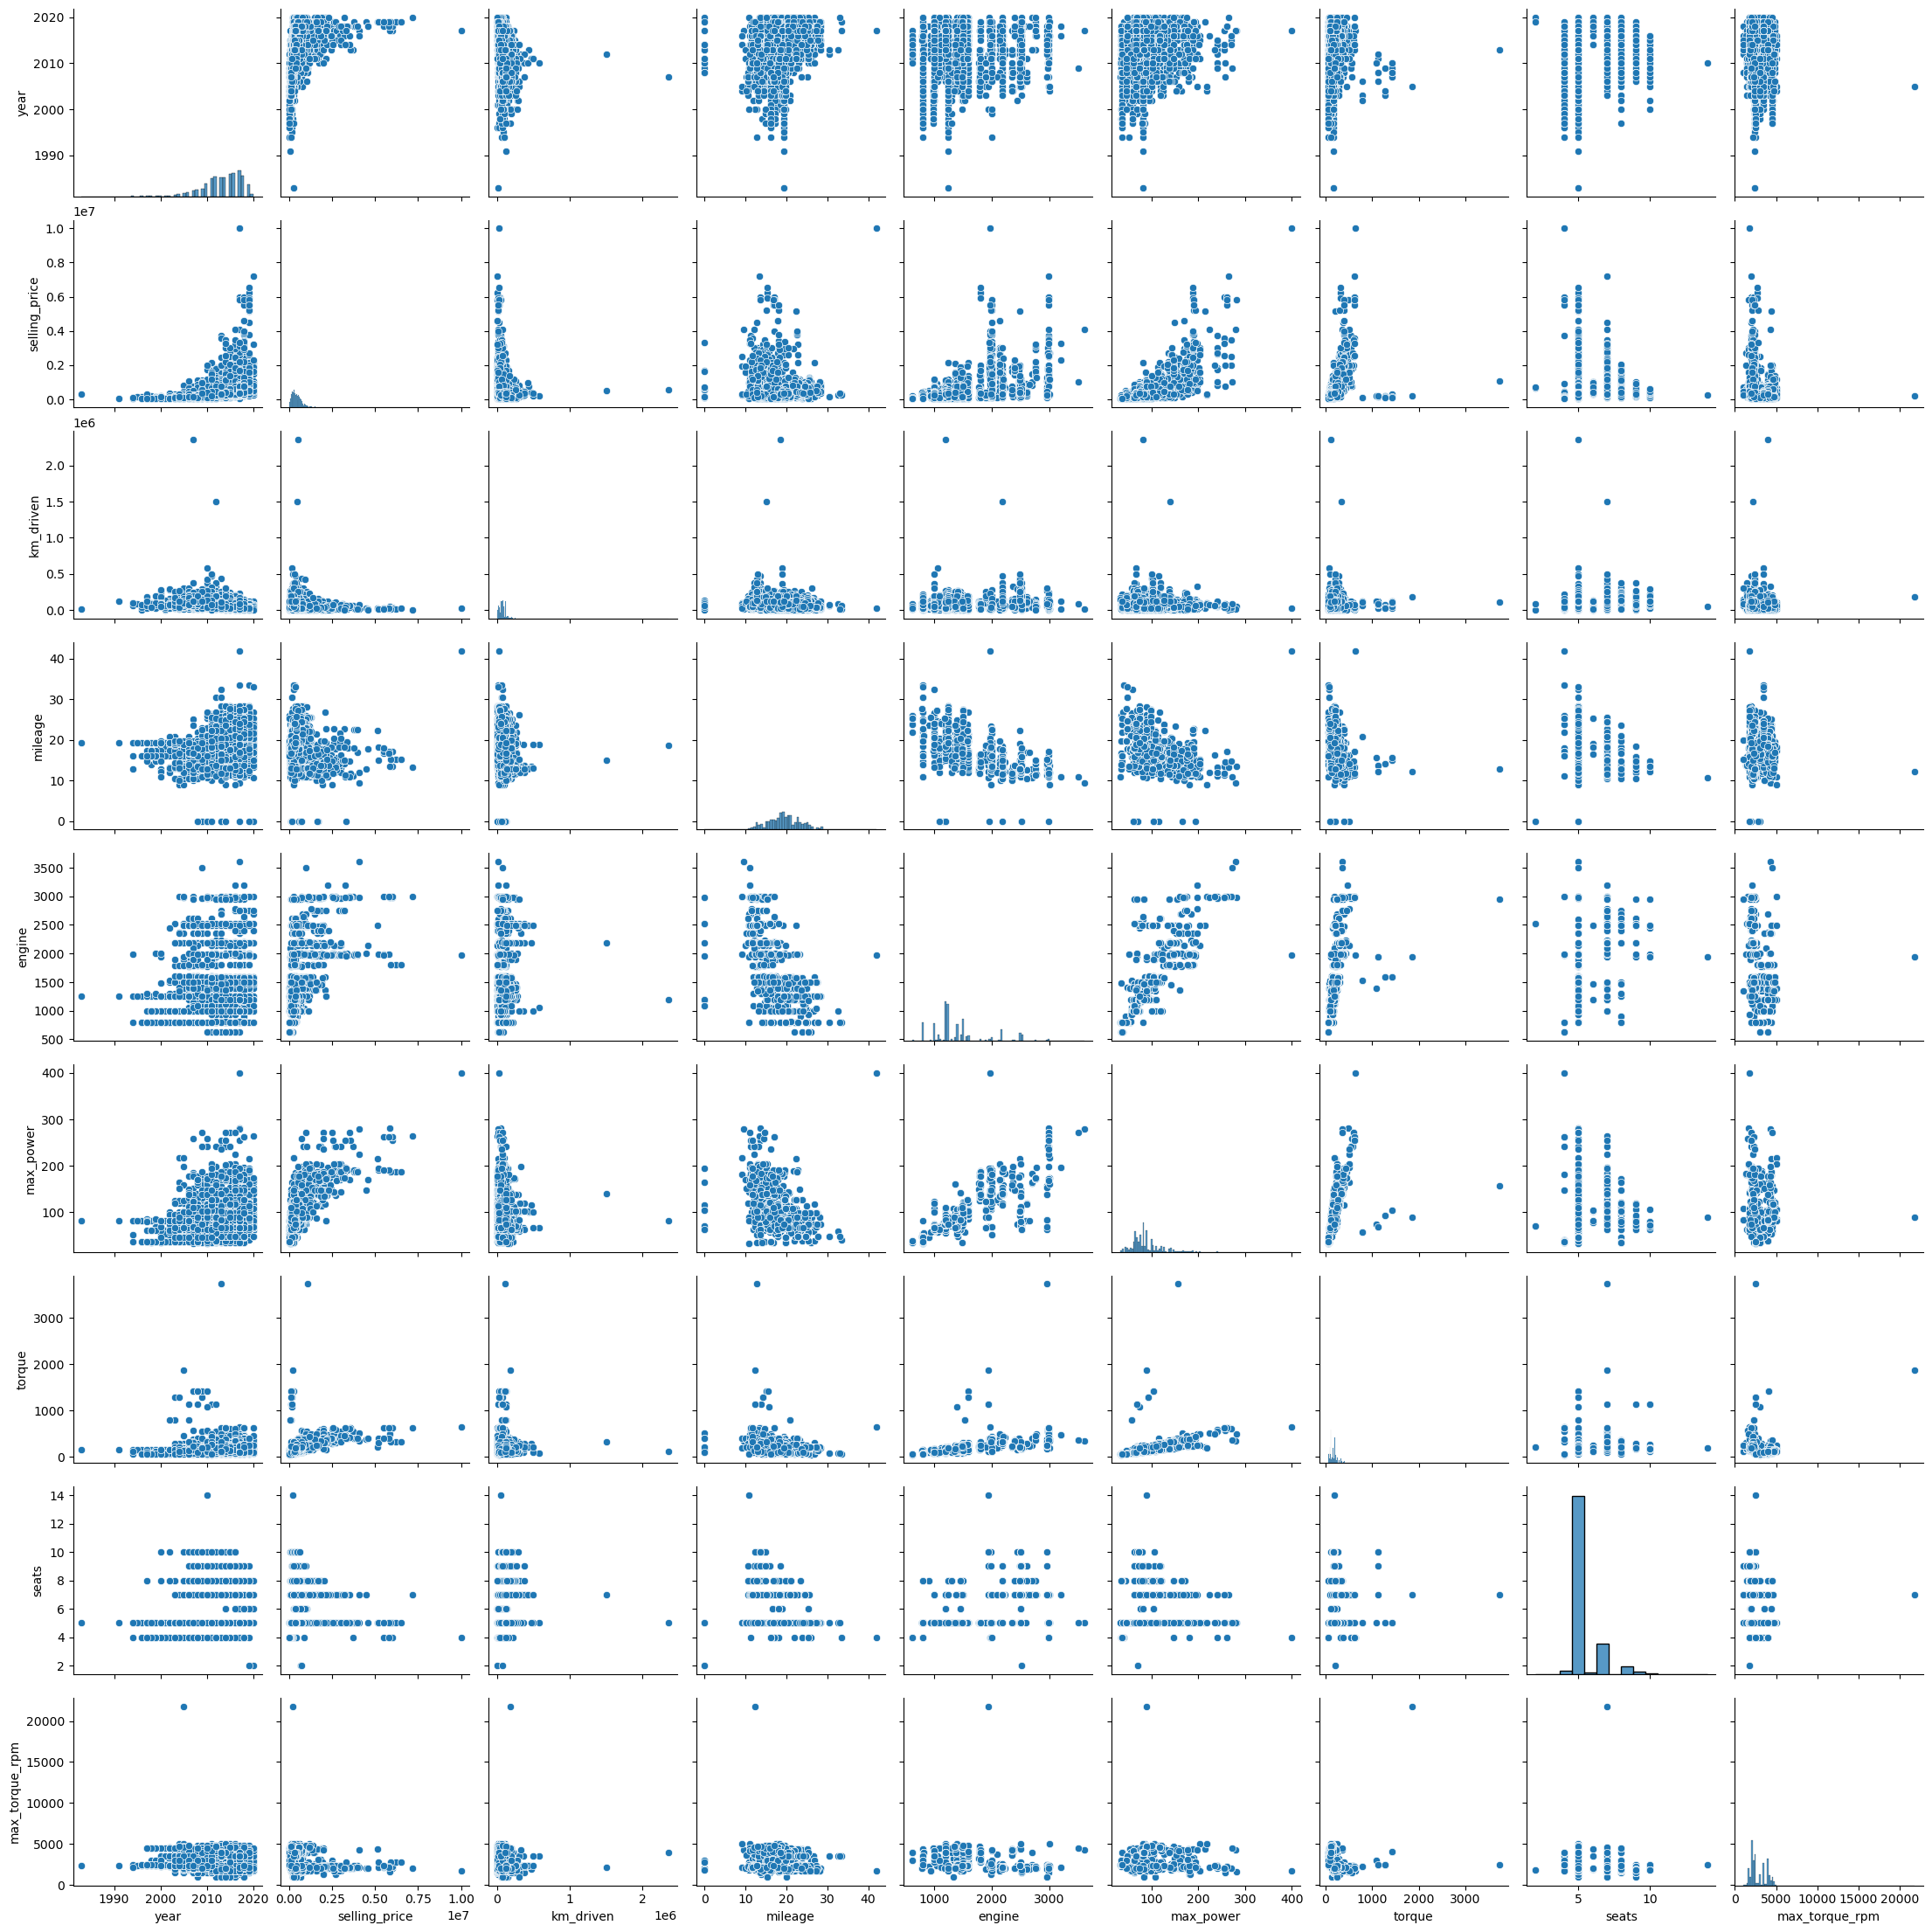

In [146]:
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?

* А о корреляциях признаков? </font>

1) С некоторыми признаками прослеживается линейная связь, например, с max_power и torque. С признаком year заметна квадратичная зависимость

2) По графикам видно попарную корреляцию между enqine, max_power и torque

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

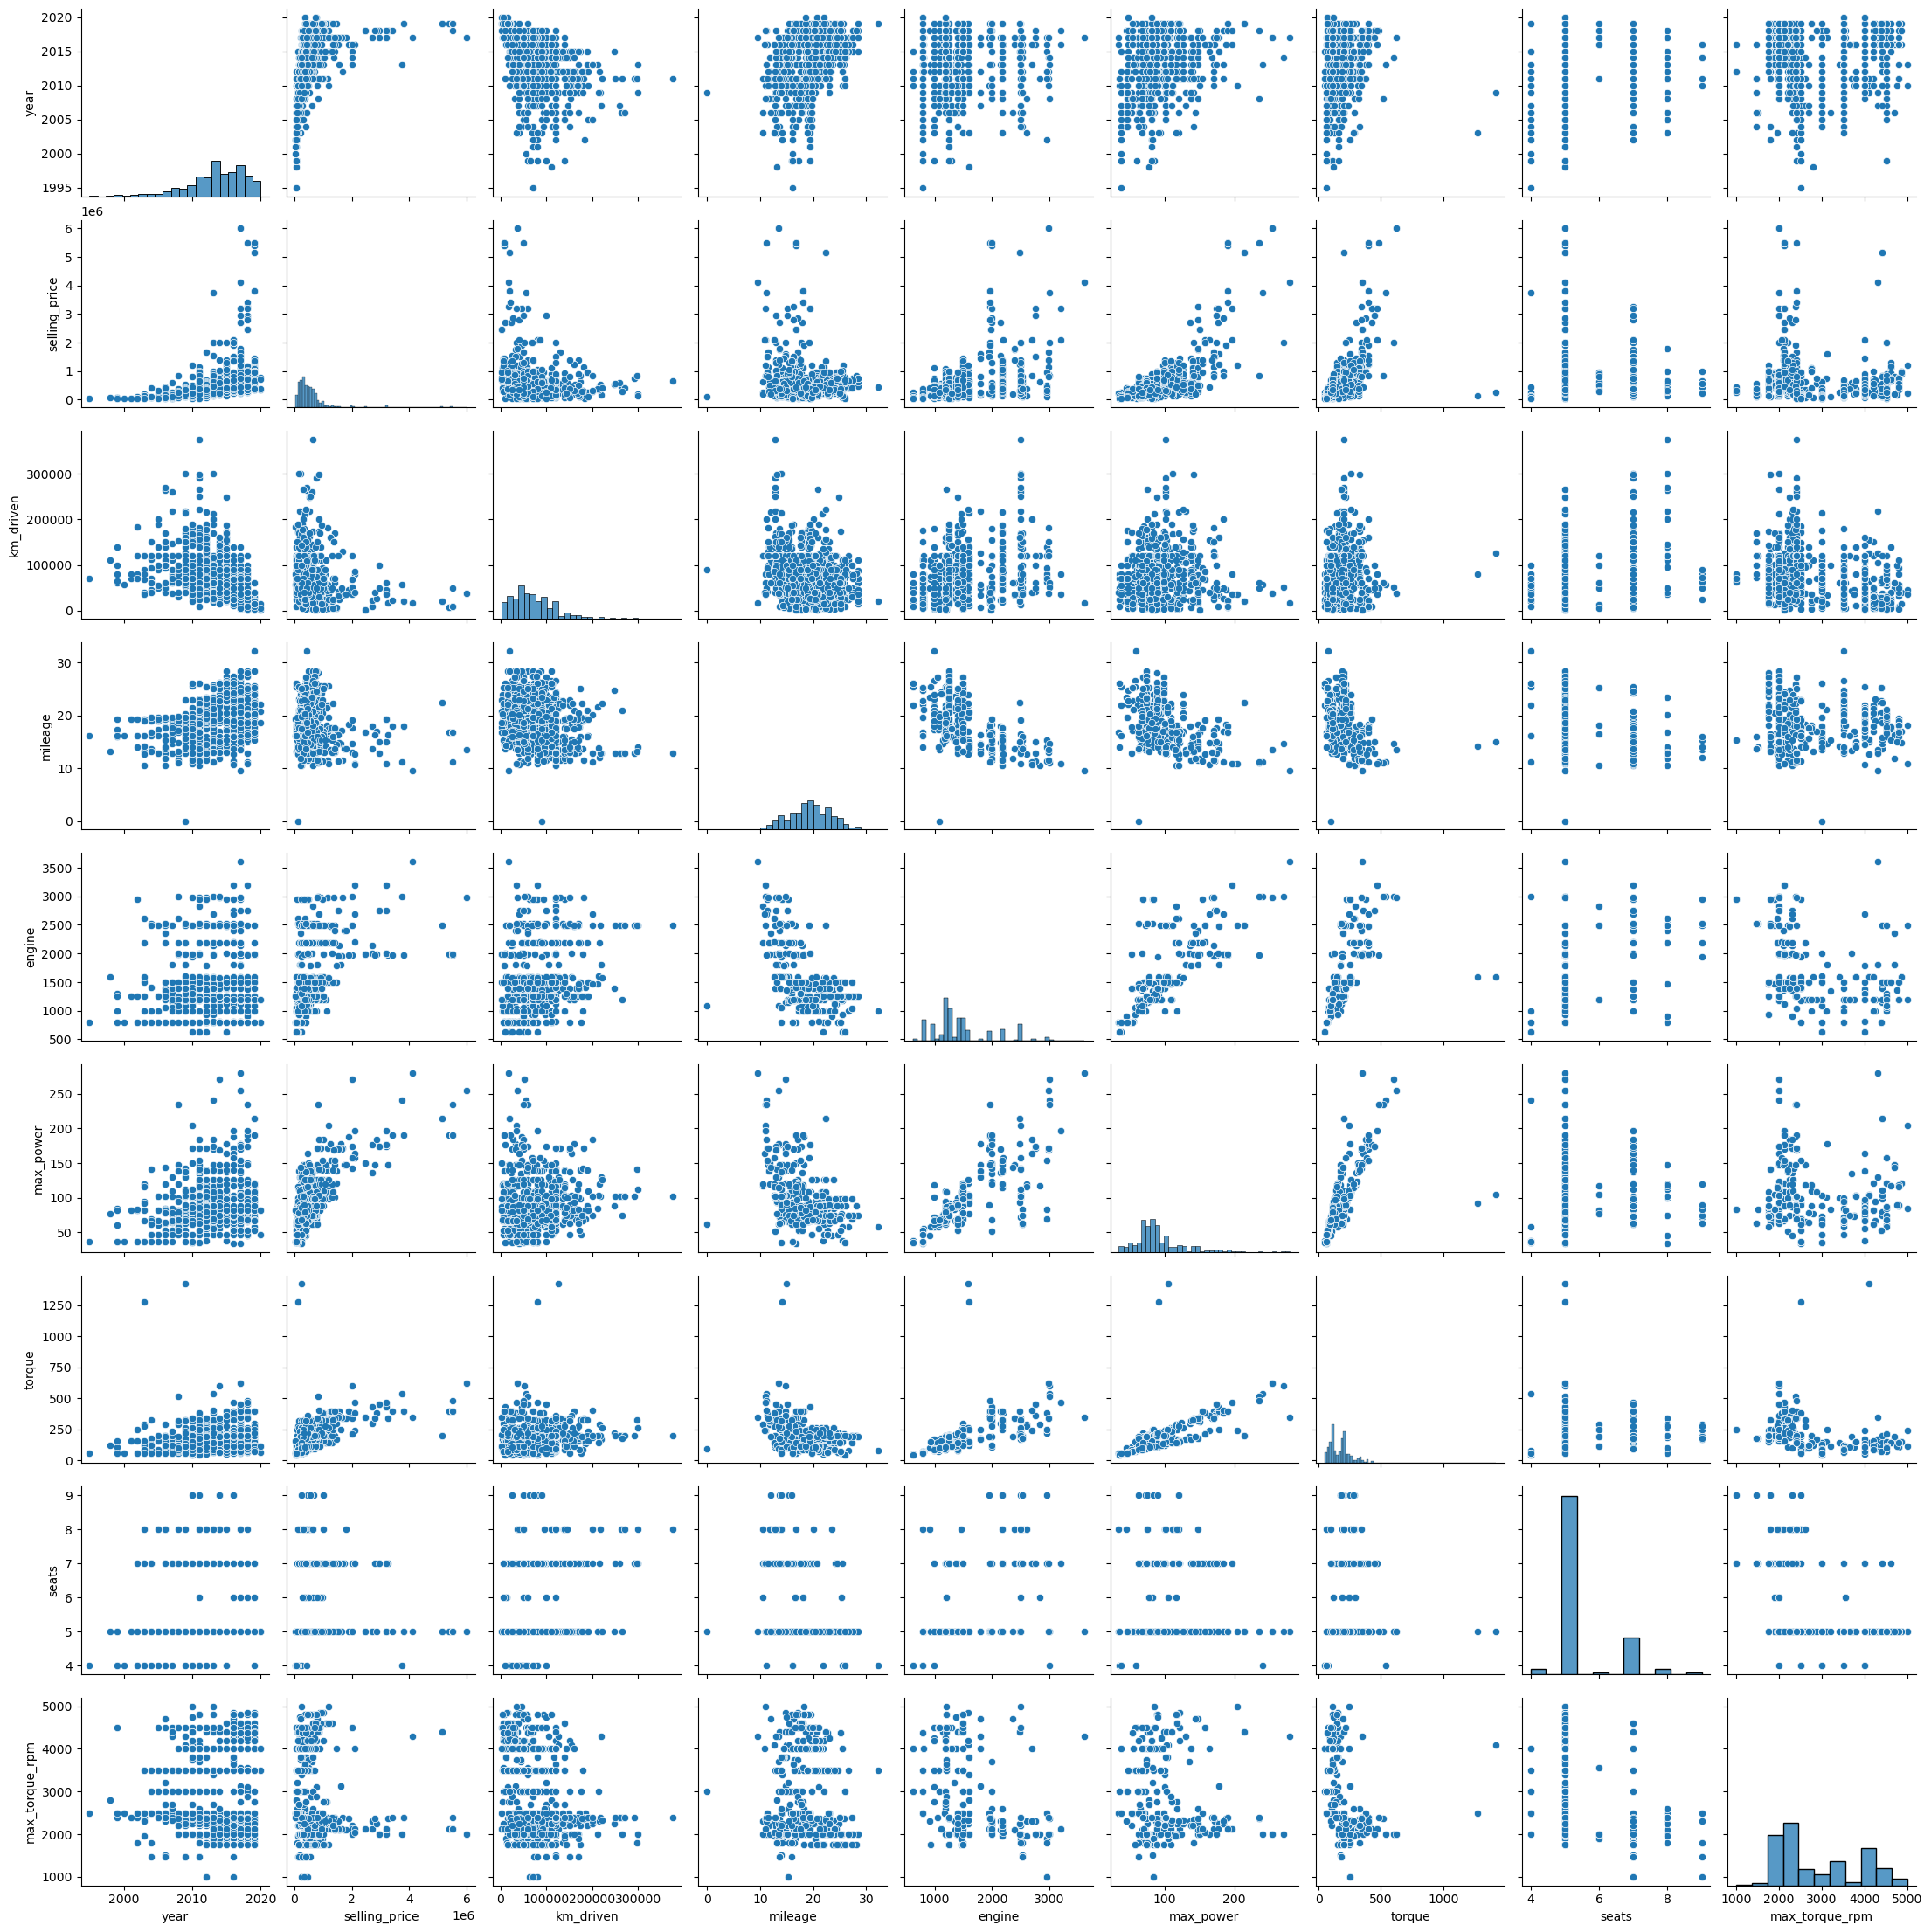

In [147]:
sns.pairplot(df_test)
plt.show()

На мой взгляд, совокупности в целом визуально похожи, трудно судить по распределниям признаков, тк они представлены в разных масштабах (в трейне есть значения сильно больше чем в тесте)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

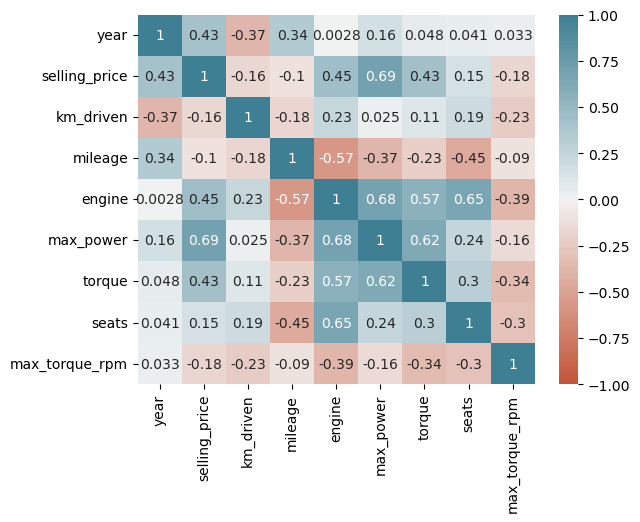

In [148]:
sns.heatmap(df_train._get_numeric_data().corr(), annot=True,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) Наименьшая корреляция у признаков year и engine

2) Высокая корреляция у max_power и целевой переменной (0.69), а если только по признакам, то у пары max_power-engine (0.68)

3) Да, так как судя по корреляции, зависимость между этими переменными - отрицательная

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Проверим еще раз у какой пары признаков максимальная корреляция

In [149]:
df_train.drop(columns=['selling_price'])._get_numeric_data().corr()\
    .unstack().sort_values(ascending=False).drop_duplicates()

year            year              1.000000
engine          max_power         0.681968
                seats             0.652172
torque          max_power         0.617236
engine          torque            0.566066
year            mileage           0.341334
seats           torque            0.298097
                max_power         0.244017
km_driven       engine            0.229766
seats           km_driven         0.192328
year            max_power         0.157138
km_driven       torque            0.106602
year            torque            0.048262
seats           year              0.041178
year            max_torque_rpm    0.032793
km_driven       max_power         0.024539
year            engine            0.002819
mileage         max_torque_rpm   -0.089986
max_torque_rpm  max_power        -0.156166
km_driven       mileage          -0.182086
torque          mileage          -0.226219
max_torque_rpm  km_driven        -0.232845
seats           max_torque_rpm   -0.298317
max_torque_

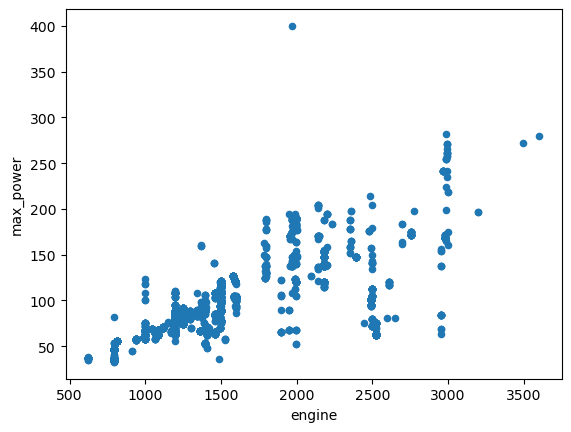

In [150]:
df_train[['engine', 'max_power']].plot.scatter(x='engine', y='max_power')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Как мы ранее заметили, масштабы графиков трейна и теста получились разные. Интересно будет посмотреть на разброс каждой переменной и понять, где происходят различия в масштабах

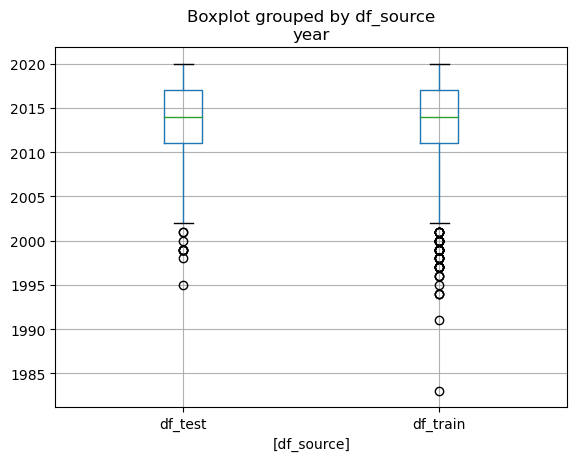

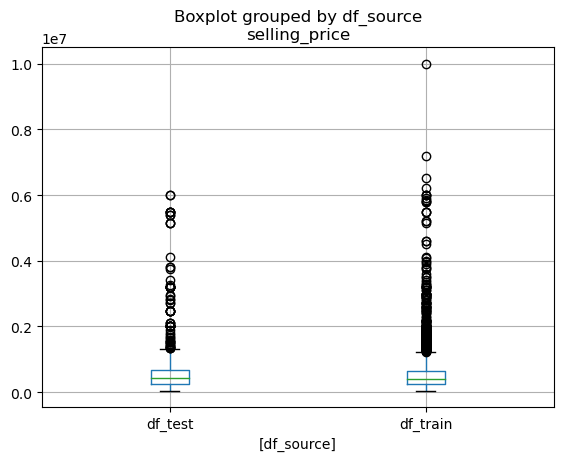

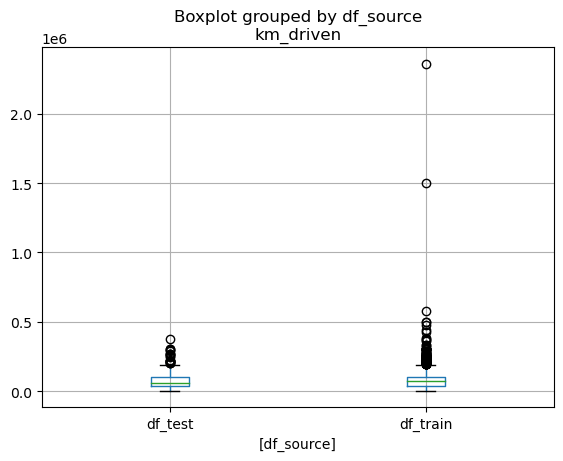

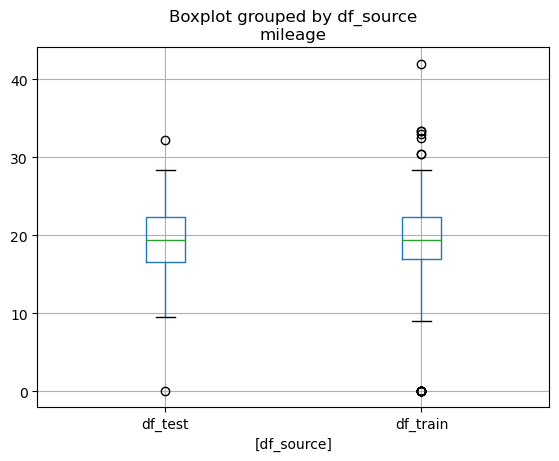

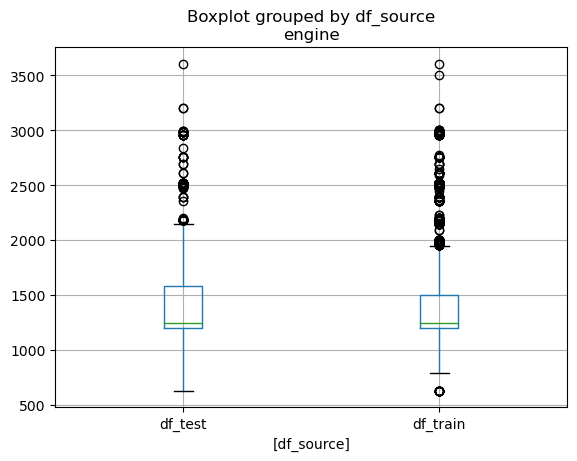

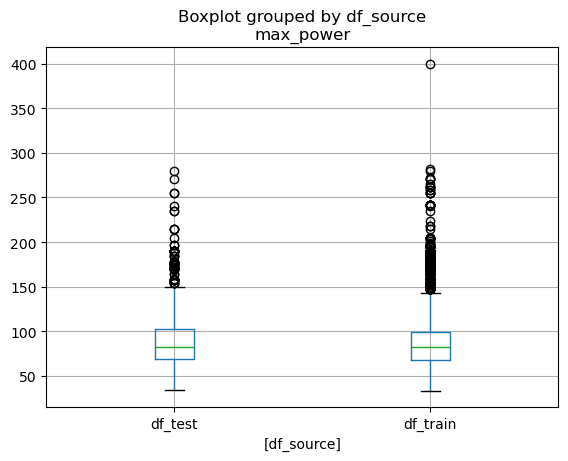

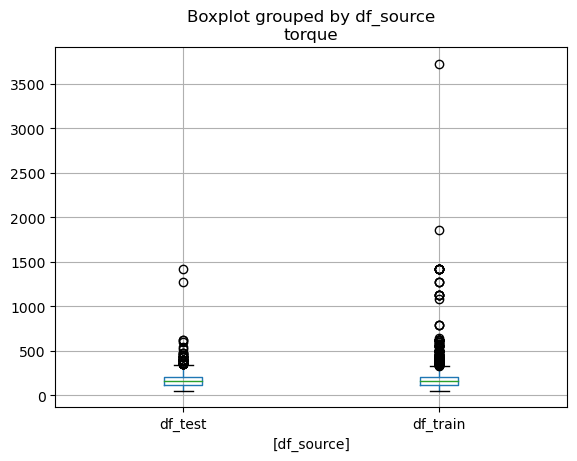

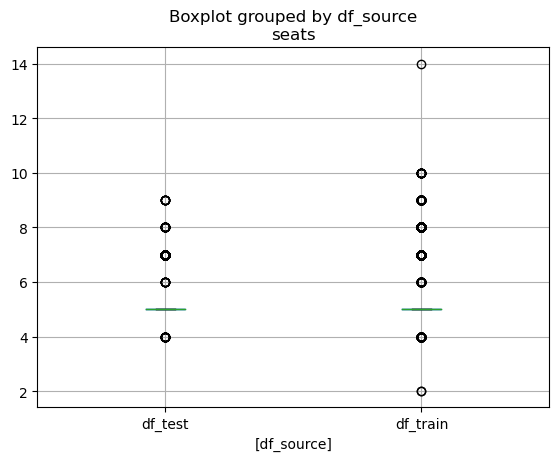

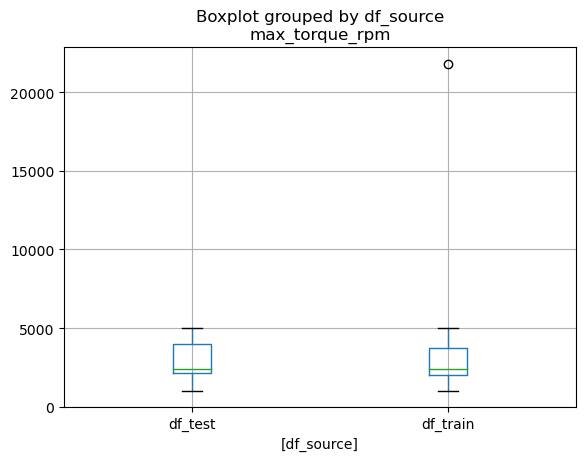

In [162]:
for col in df_train._get_numeric_data().columns:
    df_tmp = df_train[[col]].copy()
    df_tmp['df_source'] = 'df_train'
    df_tmp = pd.concat([df_tmp, df_test[[col]]])
    df_tmp['df_source'] = df_tmp['df_source'].fillna('df_test')
    df_tmp.boxplot(by='df_source', vert=True)
    plt.show()

У трейна и теста достаточно хорошо совпадают распределения, однако в трейне есть сильные выбросы в признаках max_torque_rpm, km_driven (разница более чем в 2 раза с последним выбросом в тесте)

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [163]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['selling_price'])._get_numeric_data()

In [164]:
assert X_train.shape == (5840, 8) # у меня вместо torque - два новых признака

In [165]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['selling_price'])._get_numeric_data()

In [166]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [168]:
def print_metrics(y_true, y_pred, test=True):
    if test:
        print('Для теста:')
    else:
        print('Для трейна:')
    print('MSE =', MSE(y_true, y_pred))
    print('R2 =', r2_score(y_true, y_pred))
    print()

In [169]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

print_metrics(y_train, y_pred_train, test=False)
print_metrics(y_test, y_pred)

Для трейна:
MSE = 114029805306.98558
R2 = 0.6021822971754324

Для теста:
MSE = 230034027852.5199
R2 = 0.5998215022616122



Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [170]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


lr = LinearRegression()
lr.fit(X_scaled, y_scaled)
y_pred_train = lr.predict(X_scaled)
y_pred = lr.predict(X_test_scaled)

print_metrics(y_scaled, y_pred_train, test=False)
print_metrics(y_test_scaled, y_pred)

Для трейна:
MSE = 0.3978177028245688
R2 = 0.6021822971754313

Для теста:
MSE = 0.8025235883320997
R2 = 0.5998215022616091



Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [171]:
lr.coef_

array([[ 0.30777612, -0.09289564, -0.0156989 ,  0.02894952,  0.61367549,
         0.0065272 , -0.05768229, -0.11790978]])

In [172]:
X_train.head()

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.000000,5,2000.0
1,2014,120000,21.14,1498,103.52,250.000000,5,2000.0
2,2010,127000,23.00,1396,90.00,219.668960,5,2250.0
3,2007,120000,16.10,1298,88.20,112.776475,5,4500.0
4,2017,45000,20.14,1197,81.86,113.750000,5,4000.0


Признак max_power оказался более информативным, тк при нем наибольший коэффициент (0.61)

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [173]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
y_pred_train = lasso.predict(X_scaled)
y_pred = lasso.predict(X_test_scaled)

print_metrics(y_scaled, y_pred_train, test=False)
print_metrics(y_test_scaled, y_pred)

Для трейна:
MSE = 1.0000000000000002
R2 = 0.0

Для теста:
MSE = 2.036860606790344
R2 = -0.015680821820977853



In [174]:
lasso.coef_

array([ 0., -0., -0.,  0.,  0.,  0.,  0., -0.])

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Занулила все веса, потому что по дефолту у Лассо используется альфа=1, а у нас все значения нормализированы и штраф получается слишком большой. Необходимо подобрать другое значение гиперпараметра, меньшее 1



(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [175]:
from sklearn.model_selection import GridSearchCV

a = np.arange(0.01, 0.9, 0.01)
parameters = {'alpha': a}

lasso = Lasso()
clf = GridSearchCV(lasso, parameters, cv=10)

clf.fit(X_scaled, y_scaled)
y_pred_train = clf.predict(X_scaled)
y_pred = clf.predict(X_test_scaled)

print_metrics(y_scaled, y_pred_train, test=False)
print_metrics(y_test_scaled, y_pred)

Для трейна:
MSE = 0.4050585327046501
R2 = 0.5949414672953499

Для теста:
MSE = 0.8544235543012368
R2 = 0.5739415770903528



In [176]:
clf.best_estimator_.coef_

array([ 0.27526894, -0.05298284,  0.        ,  0.        ,  0.60175915,
        0.        , -0.        , -0.0642131 ])

In [177]:
clf.best_params_

{'alpha': 0.04}

In [178]:
len(a) * 10

890

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

890 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Коэффициент регуляризации лучшей модели = 0.04, веса некоторых признаков занулились (mileage, engine, torque, seats)

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [181]:
%%time

from sklearn.linear_model import ElasticNet

a = np.arange(0.01, 0.9, 0.02)
parameters = {'alpha': a, 'l1_ratio': a}

eln = ElasticNet(random_state=21)
clf = GridSearchCV(eln, parameters, cv=10, n_jobs=-1)

clf.fit(X_scaled, y_scaled)
y_pred_train = clf.predict(X_scaled)
y_pred = clf.predict(X_test_scaled)

print_metrics(y_scaled, y_pred_train, test=False)
print_metrics(y_test_scaled, y_pred)

Для трейна:
MSE = 0.406143608762775
R2 = 0.593856391237225

Для теста:
MSE = 0.8660666542434581
R2 = 0.5681357437022283

CPU times: user 10.1 s, sys: 1.3 s, total: 11.4 s
Wall time: 34.1 s


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [182]:
clf.best_params_

{'alpha': 0.06999999999999999, 'l1_ratio': 0.5099999999999999}

Лучшими оказались alpha = 0.07 и l1_ratio = 0.51

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [211]:
X_train_cat = df_train.drop(columns=['selling_price', 'name'])

In [212]:
assert X_train_cat.shape == (5840, 12)

In [213]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [214]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

one_hot_enc = OneHotEncoder(drop='first')

arr_enc = one_hot_enc.fit_transform(X_train_cat[['fuel', 'seller_type',
                                                 'transmission', 'owner']]).toarray()

X_train_cat = X_train_cat.drop(columns=['fuel', 'seller_type', 'transmission', 'owner'])
data_enc = pd.DataFrame(arr_enc, columns=one_hot_enc.get_feature_names_out())

X_train_cat = pd.concat([X_train_cat, data_enc], axis=1)
X_train_cat

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,23.40,1248,74.00,190.000000,5,2000.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.000000,5,2000.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,219.668960,5,2250.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,112.776475,5,4500.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,113.750000,5,4000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.100000,5,3000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5836,2013,50000,18.90,998,67.10,90.000000,5,3500.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5837,2013,110000,18.50,1197,82.85,113.700000,5,4000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5838,2007,119000,16.80,1493,110.00,235.359600,5,2325.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [216]:
X_test_cat = df_test.drop(columns=['selling_price', 'name'])
arr_enc = one_hot_enc.transform(X_test_cat[['fuel', 'seller_type',
                                            'transmission', 'owner']]).toarray()

X_test_cat = X_test_cat.drop(columns=['fuel', 'seller_type', 'transmission', 'owner'])
data_enc = pd.DataFrame(arr_enc, columns=one_hot_enc.get_feature_names_out())

X_test_cat = pd.concat([X_test_cat, data_enc], axis=1)
X_test_cat

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2010,168000,14.00,2498,112.00,260.00000,7,2000.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,25000,21.50,1497,108.50,260.00000,5,2125.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007,218463,12.90,1799,130.00,172.00000,5,4300.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,173000,25.10,1498,98.60,200.00000,5,1750.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2011,70000,16.50,1172,65.00,96.00000,5,3000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04000,5,4500.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
996,2017,50000,18.60,1197,81.83,114.70000,5,4000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
997,2009,40000,23.00,1396,90.00,219.66896,5,2250.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,2012,25000,20.36,1197,78.90,111.80000,5,4000.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [217]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X_train_cat)
X_test_scaled = scaler_x.transform(X_test_cat)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

a = np.arange(0.01, 0.9, 0.01)
parameters = {'alpha': a}

ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=10, scoring='r2')

clf.fit(X_scaled, y_scaled)
y_pred_train = clf.predict(X_scaled)
y_pred = clf.predict(X_test_scaled)

print_metrics(y_scaled, y_pred_train, test=False)
print_metrics(y_test_scaled, y_pred)

Для трейна:
MSE = 0.339995806824844
R2 = 0.6600041931751561

Для теста:
MSE = 0.7431627830955237
R2 = 0.6294217759600863



In [218]:
clf.best_estimator_

Ridge(alpha=0.89)

In [220]:
X_test_scaled[0]

array([-0.83716668,  1.56574049, -1.3626047 ,  2.20037946,  0.76172416,
        0.72009629,  1.60170212, -0.87055599,  0.91553927, -0.07652458,
       -0.88930405,  0.3437024 , -0.06556848,  0.3073317 , -0.15672078,
       -0.62461604, -0.02618016, -0.2903319 ])

Предсказание удалось улучшить, на трейне и на тесте улучшились обе метрики при альфе=0.89

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

1) Как уже упоминалось ранее, в трейне есть сильные выбросы, попробуем от них избавится

Во-первых, удалим 2 выброса в переменной km_driven

In [250]:
df_train[df_train['km_driven'] > 1_000_000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
1397,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1,2179,140.00,330.0,7,2200.0
2680,Hyundai i20 Asta 1.2,2007,550000,2360457,Petrol,Individual,Manual,Second Owner,18.6,1197,81.83,114.7,5,4000.0


In [272]:
df_train = df_train[df_train['km_driven'] < 1_000_000]
df_train.shape

(5838, 14)

Также удалим выброс в признаке max_torque_rpm

In [273]:
df_train.sort_values(by=['max_torque_rpm'], ascending=False).head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
3936,Tata Sumo EX TC,2005,225000,188000,Diesel,Individual,Manual,First Owner,12.30,1948,90.0,1863.2635,7,21800.0
1559,Chevrolet Sail 1.2 LS ABS,2014,300000,50000,Petrol,Individual,Manual,First Owner,18.20,1199,82.4,108.5000,5,5000.0
5659,Chevrolet Sail Hatchback 1.2 LS,2014,300000,60175,Petrol,Individual,Manual,First Owner,18.20,1199,82.5,108.5000,5,5000.0
2625,Chevrolet Sail 1.2 LS ABS,2016,550000,15000,Petrol,Individual,Manual,First Owner,18.20,1199,82.4,108.5000,5,5000.0
4263,Hyundai Verna 1.4 VTVT,2014,550000,40000,Petrol,Individual,Manual,First Owner,17.43,1396,105.5,135.3000,5,5000.0


In [274]:
df_train = df_train[df_train['max_torque_rpm'] <= 5_000]
df_train.shape

(5837, 14)

2) Создадим категориальный признак - марку автомобиля, это первое слово в колонке name

In [296]:
df_train['car'] = df_train['name'].apply(lambda x: x.split(' ')[0])
df_test['car'] = df_test['name'].apply(lambda x: x.split(' ')[0])
df_train['car'].value_counts()

Maruti           1804
Hyundai          1057
Mahindra          610
Tata              533
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: car, dtype: int64

In [295]:
df_train['car'].nunique()

30

В целом таких категорий получилось немного, можно закодировать при помощи one-hot encoder

3) Попробуем сделать зависимость цены от года - квадратичной

In [309]:
df_train['year_2'] = df_train['year'] ** 2
df_test['year_2'] = df_test['year'] ** 2

4) Посмотрим снова на распределение признаков

year


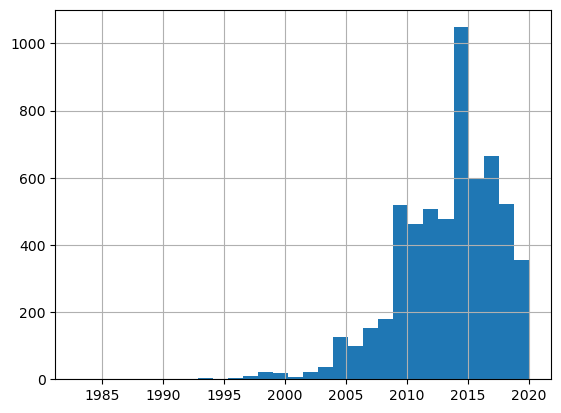

selling_price


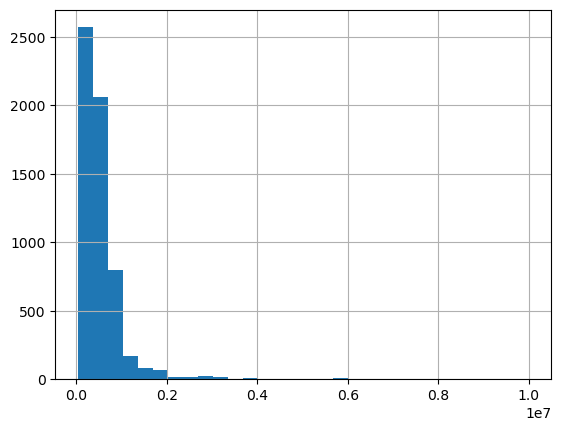

km_driven


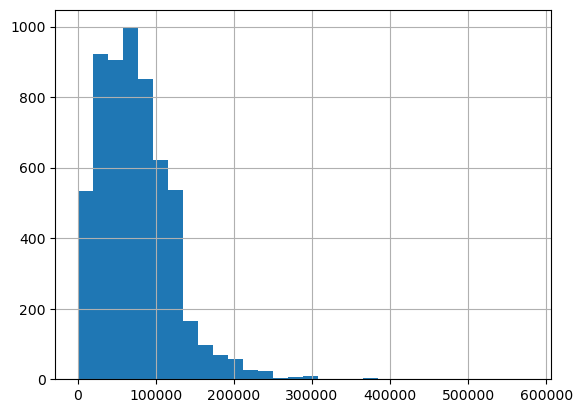

mileage


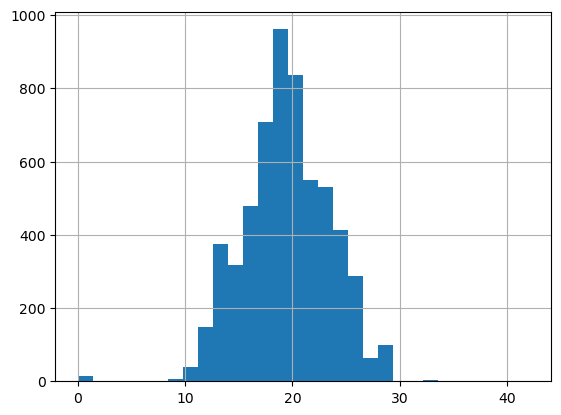

engine


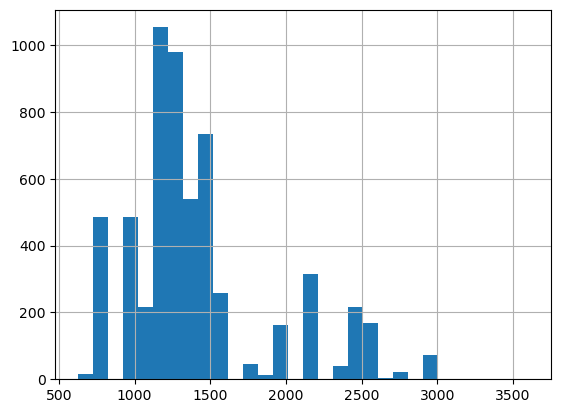

max_power


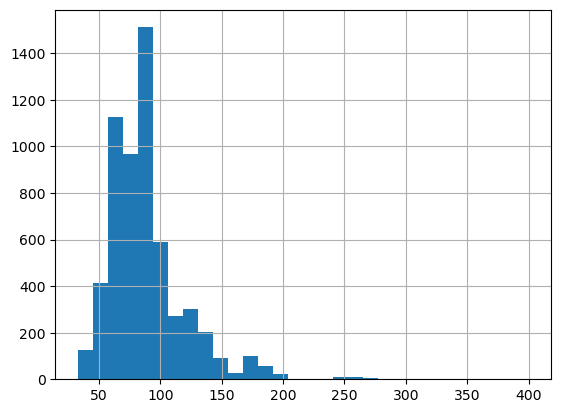

torque


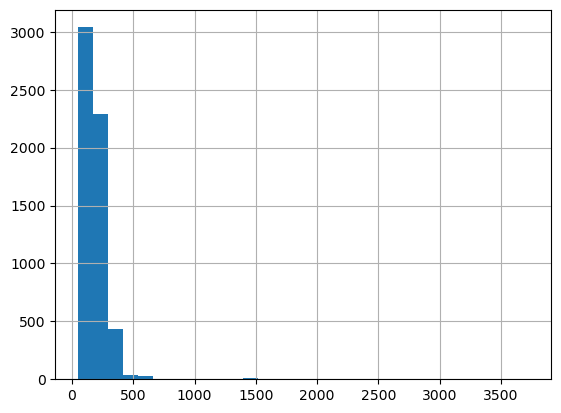

seats


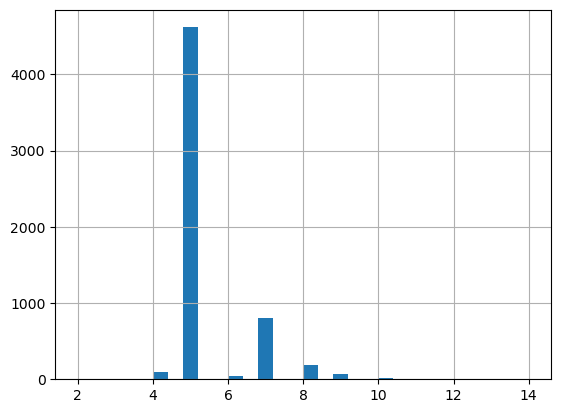

max_torque_rpm


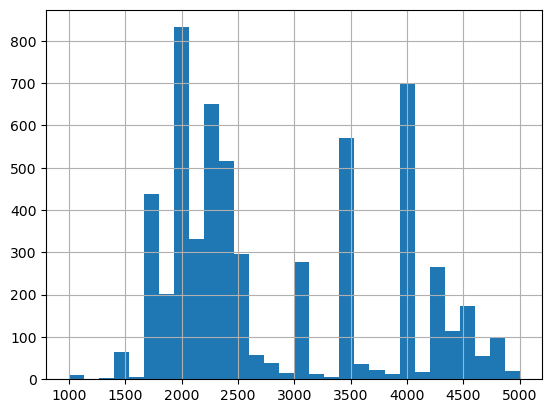

year_2


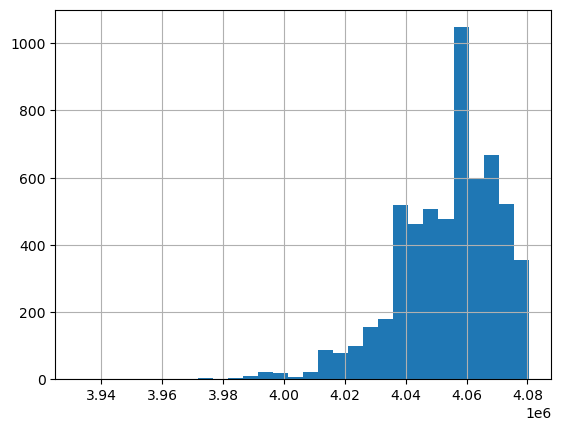

torque_log


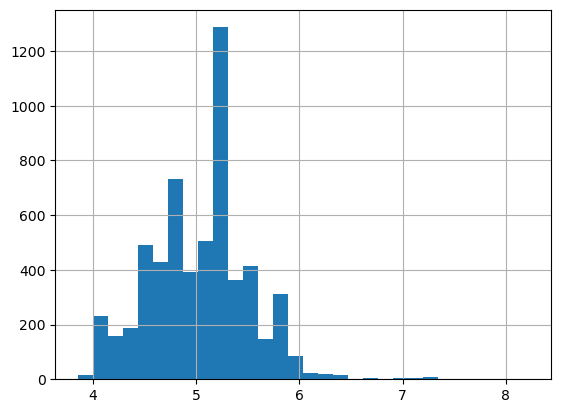

max_power_log


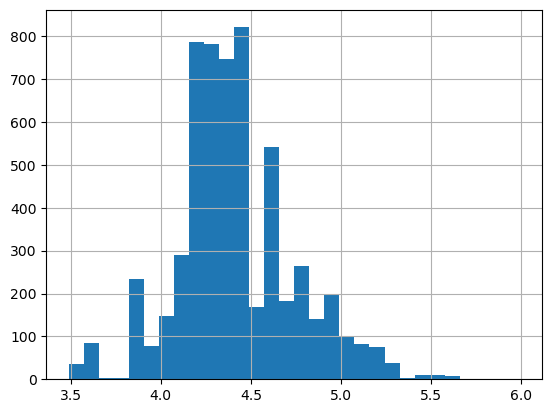

engine_log


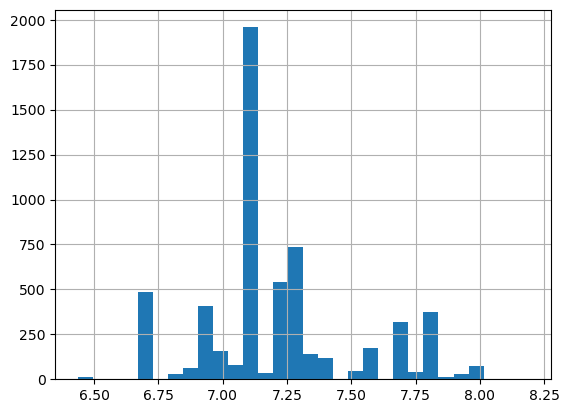

km_driven_log


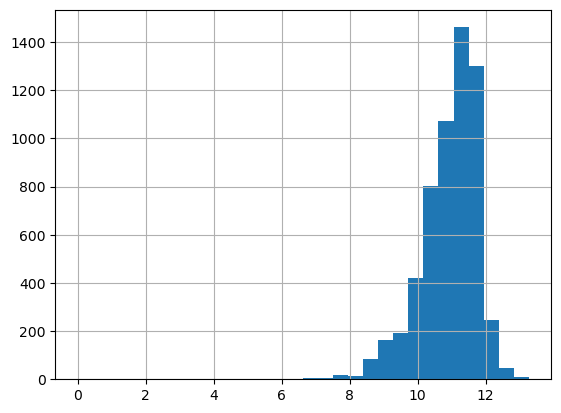

In [341]:
for col in df_train._get_numeric_data().columns:
    print(col)
    df_train[col].hist(bins=30)
    plt.show()

Попробуем отлогарифмировать некоторый признаки: torque, max_power, engine, km_driven

In [336]:
df_train['torque_log'] = np.log(df_train['torque'])
df_train['max_power_log'] = np.log(df_train['max_power'])
df_train['engine_log'] = np.log(df_train['engine'])
df_train['km_driven_log'] = np.log(df_train['km_driven'])


df_test['torque_log'] = np.log(df_test['torque'])
df_test['max_power_log'] = np.log(df_test['max_power'])
df_test['engine_log'] = np.log(df_test['engine'])
df_test['km_driven_log'] = np.log(df_test['km_driven'])

5) Целевую переменную также можно попробовать отлогарифмировать (при подсчете метрик, необходимо будет обратно перевести)

In [342]:
df_train['selling_price_log'] = np.log(df_train['selling_price'])
df_test['selling_price_log'] = np.log(df_test['selling_price'])

6) Вставим дамми-переменную, которая будет отвечать за то, был ли хоть один пропуск в данных

Для этого необходимо найти эти строки по индексам

In [356]:
df_train_copy = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test_copy = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
df_train_copy.drop_duplicates(subset=df_train_copy.drop(columns=['selling_price']).columns,
                              keep='first', inplace=True)
df_train_copy.reset_index(drop=True, inplace=True)

In [360]:
df_train['was_nan'] = 0
df_train.loc[df_train_copy.isna().any(axis=1), 'was_nan'] = 1

In [362]:
df_train['was_nan'].value_counts()

0    5650
1     187
Name: was_nan, dtype: int64

In [363]:
df_test['was_nan'] = 0
df_test.loc[df_test_copy.isna().any(axis=1), 'was_nan'] = 1

Попробуем обучить модель с новыми признаками

In [364]:
X_train_cat = df_train.drop(columns=['selling_price', 'name', 'year',
                                     'torque', 'max_power', 'engine',
                                     'km_driven', 'selling_price_log']).reset_index(drop=True)
y_train = df_train['selling_price_log']

one_hot_enc = OneHotEncoder(drop='first', handle_unknown='ignore')

arr_enc = one_hot_enc.fit_transform(X_train_cat[['fuel', 'seller_type', 'car',
                                                 'transmission', 'owner']]).toarray()

X_train_cat = X_train_cat.drop(columns=['fuel', 'seller_type', 'car', 'transmission', 'owner'])
data_enc = pd.DataFrame(arr_enc, columns=one_hot_enc.get_feature_names_out())

X_train_cat = pd.concat([X_train_cat, data_enc], axis=1)


y_test = df_test['selling_price_log']
X_test_cat = df_test.drop(columns=['selling_price', 'name', 'year',
                                   'torque', 'max_power', 'engine',
                                   'km_driven', 'selling_price_log'])
arr_enc = one_hot_enc.transform(X_test_cat[['fuel', 'seller_type', 'car',
                                            'transmission', 'owner']]).toarray()

X_test_cat = X_test_cat.drop(columns=['fuel', 'seller_type', 'car', 'transmission', 'owner'])
data_enc = pd.DataFrame(arr_enc, columns=one_hot_enc.get_feature_names_out())

X_test_cat = pd.concat([X_test_cat, data_enc], axis=1)

/Users/kucumovamilana/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [387]:
X_train_cat

,mileage,seats,max_torque_rpm,year_2,torque_log,max_power_log,engine_log,km_driven_log,was_nan,fuel_Diesel,...,car_Skoda,car_Tata,car_Toyota,car_Volkswagen,car_Volvo,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,23.40,5,2000.0,4056196,5.247024,4.304065,7.129298,11.887931,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,21.14,5,2000.0,4056196,5.521461,4.639765,7.311886,11.695247,0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,23.00,5,2250.0,4040100,5.392122,4.499810,7.241366,11.751942,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16.10,5,4500.0,4028049,4.725408,4.479607,7.168580,11.695247,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,20.14,5,4000.0,4068289,4.734003,4.405010,7.087574,10.714418,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,17.92,5,3000.0,4032064,4.565389,4.128746,6.990257,12.160029,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5833,18.90,5,3500.0,4052169,4.499810,4.206184,6.905753,10.819778,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5834,18.50,5,4000.0,4052169,4.733563,4.417032,7.087574,11.608236,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5835,16.80,5,2325.0,4028049,5.461115,4.700480,7.308543,11.686879,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [375]:
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X_train_cat)
X_test_scaled = scaler_x.transform(X_test_cat)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

a = np.arange(0.01, 0.9, 0.01)
parameters = {'alpha': a}

ridge = Ridge()
clf = GridSearchCV(ridge, parameters, cv=10, scoring='r2')

clf.fit(X_scaled, y_scaled)
y_pred_train = clf.predict(X_scaled)
y_pred = clf.predict(X_test_scaled)

print_metrics(y_scaled, y_pred_train, test=False)
print_metrics(y_test_scaled, y_pred)

Для трейна:
MSE = 0.11105130998607689
R2 = 0.8889486900139231

Для теста:
MSE = 0.10542689362211065
R2 = 0.9138372522442915



Качество значительно улучшилось

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

посчитаем на последней модели, тк она показала наилучший вариант

In [376]:
def business_metrics(y_true, y_pred):
    return (abs((y_true - y_pred) / y_true) < 0.1).sum() / len(y_true)

business_metrics(y_scaled, y_pred_train)

0.18228542059277025

In [377]:
business_metrics(y_test_scaled, y_pred)

0.218

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

В пикл файл добавляем:

1) среднее по df_train

2) скалирование

3) One hot encoder

4) веса модели

5) колонки для правильного порядка

In [398]:
data = {'medians': df_train.median(numeric_only=True),
        'scaler_x': scaler_x,
        'scaler_y': scaler_y,
        'one_hot_enc': one_hot_enc,
        'model': clf,
        'columns': X_train_cat.columns}
data

{'medians': year                 2.014000e+03
 selling_price        4.050000e+05
 km_driven            7.000000e+04
 mileage              1.937000e+01
 engine               1.248000e+03
 max_power            8.186000e+01
 torque               1.600000e+02
 seats                5.000000e+00
 max_torque_rpm       2.400000e+03
 year_2               4.056196e+06
 torque_log           5.075174e+00
 max_power_log        4.405010e+00
 engine_log           7.129298e+00
 km_driven_log        1.115625e+01
 selling_price_log    1.291164e+01
 was_nan              0.000000e+00
 dtype: float64,
 'scaler_x': StandardScaler(),
 'scaler_y': StandardScaler(),
 'one_hot_enc': OneHotEncoder(drop='first', handle_unknown='ignore'),
 'model': GridSearchCV(cv=10, estimator=Ridge(),
              param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29,

In [399]:
import pickle

with open('model.pickle', 'wb') as handle:
    pickle.dump(data, handle)

with open('model.pickle', 'rb') as handle:
    data_return = pickle.load(handle)

data_return

{'medians': year                 2.014000e+03
 selling_price        4.050000e+05
 km_driven            7.000000e+04
 mileage              1.937000e+01
 engine               1.248000e+03
 max_power            8.186000e+01
 torque               1.600000e+02
 seats                5.000000e+00
 max_torque_rpm       2.400000e+03
 year_2               4.056196e+06
 torque_log           5.075174e+00
 max_power_log        4.405010e+00
 engine_log           7.129298e+00
 km_driven_log        1.115625e+01
 selling_price_log    1.291164e+01
 was_nan              0.000000e+00
 dtype: float64,
 'scaler_x': StandardScaler(),
 'scaler_y': StandardScaler(),
 'one_hot_enc': OneHotEncoder(drop='first', handle_unknown='ignore'),
 'model': GridSearchCV(cv=10, estimator=Ridge(),
              param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29,

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link